In [2]:
import os
os.chdir('..')
from notebooks import config
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
from utils.metric import acc_matrix
import matplotlib.pyplot as plt


In [3]:
path_water_jrc = config.root_proj + '/data/tibet/jrc_water/tibet_water_jrc.tif'
water_jrc, water_jrc_info= readTiff(path_water_jrc)


In [4]:
# water_jrc_info
water_jrc


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

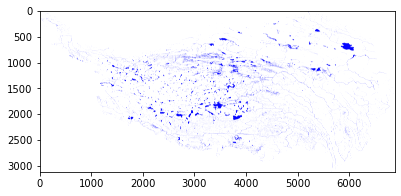

In [9]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('linear color',["white", "Blue"])
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.imshow(water_jrc, vmin=1, vmax=100, cmap=cmap)
